In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#2014 zone4 data
df_zone4=pd.read_csv(r"C:\Users\sreed\Downloads\filled_data_zone4_2014.csv")

In [3]:
#2014 zone9 data
df_zone9=pd.read_csv(r"C:\Users\sreed\Downloads\filled_data_zone9_2014.csv")

In [4]:
#concatinating both zone4 and zone 9 data
df_2014=pd.concat([df_zone4,df_zone9])

In [5]:
df_2014.head()

,Latitude,Longitude,Zone,NDVI,landuse,LST,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Suitable_Areas
0,45.47236,9.202701,zone4,0.360761,grass,121.681648,-0.130789,-0.381272,0,0.541073,0.0,0.214375,467.293863,0
1,45.47236,9.202971,zone4,0.361043,grass,121.681648,-0.130598,-0.381346,0,0.541497,0.0,0.215051,467.363286,0
2,45.47236,9.203240,zone4,0.361316,grass,121.681648,-0.130393,-0.381412,0,0.541907,0.0,0.215769,467.438801,0
3,45.47236,9.203510,zone4,0.361578,grass,121.681648,-0.130170,-0.381469,0,0.542301,0.0,0.216531,467.520987,0
4,45.47236,9.203779,zone4,0.361827,grass,121.681648,-0.129930,-0.381516,0,0.542676,0.0,0.217339,467.610465,0


In [6]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114446 entries, 0 to 62369
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Latitude         114446 non-null  float64
 1   Longitude        114446 non-null  float64
 2   Zone             114446 non-null  object 
 3   NDVI             114446 non-null  float64
 4   landuse          114446 non-null  object 
 5   LST              52076 non-null   float64
 6   NDBI             114446 non-null  float64
 7   NDWI             114446 non-null  float64
 8   Roughness        114446 non-null  int64  
 9   SAVI             114446 non-null  float64
 10  Slope            114446 non-null  float64
 11  SMI              114446 non-null  float64
 12  solar_radiation  114446 non-null  float64
 13  Suitable_Areas   114446 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 13.1+ MB


In [7]:
df_2014.isnull().sum()

Latitude               0
Longitude              0
Zone                   0
NDVI                   0
landuse                0
LST                62370
NDBI                   0
NDWI                   0
Roughness              0
SAVI                   0
Slope                  0
SMI                    0
solar_radiation        0
Suitable_Areas         0
dtype: int64

In [8]:
#Droping LST column
df_2014.drop('LST',axis=1,inplace=True)

In [9]:
df_2014.isnull().sum()

Latitude           0
Longitude          0
Zone               0
NDVI               0
landuse            0
NDBI               0
NDWI               0
Roughness          0
SAVI               0
Slope              0
SMI                0
solar_radiation    0
Suitable_Areas     0
dtype: int64

In [10]:
#independent variable ,dependent variable split
y = df_2014['Suitable_Areas']
X = df_2014.drop(columns=['Suitable_Areas'])

# Defining columns
numerical_features = ['NDVI',  'NDBI', 'NDWI', 'Roughness', 'SAVI', 'Slope', 'SMI', 'solar_radiation']
categorical_features = ['Zone', 'landuse']

# Spliting  data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fitting the preprocessor on the training data and transform both training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the names of the output columns after OneHotEncoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combining numerical and categorical feature names
all_feature_names = numerical_features + list(cat_feature_names)

# Converting to DataFrame with appropriate column names
df_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
df_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)




In [11]:
df_train_preprocessed.head()

,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Zone_zone4,Zone_zone9,...,landuse_industrial,landuse_meadow,landuse_military,landuse_plant_nursery,landuse_railway,landuse_recreation_ground,landuse_religious,landuse_residential,landuse_retail,landuse_village_green
0,0.698372,-0.719860,-0.645282,-0.244436,0.698330,-1.178294,-0.080523,0.688411,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.470909,-2.747785,-2.200569,-0.150471,2.470809,0.848857,0.349169,0.466210,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.470538,0.475476,0.513773,-0.150471,-0.470713,0.848773,-0.008083,1.426112,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.745556,-2.138081,-1.417016,-0.244436,1.745388,0.848682,0.383834,-1.228176,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.464388,-0.771818,-0.003959,-0.244436,0.464285,0.848298,0.303835,-0.446656,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:

df_test_preprocessed.head()

,NDVI,NDBI,NDWI,Roughness,SAVI,Slope,SMI,solar_radiation,Zone_zone4,Zone_zone9,...,landuse_industrial,landuse_meadow,landuse_military,landuse_plant_nursery,landuse_railway,landuse_recreation_ground,landuse_religious,landuse_residential,landuse_retail,landuse_village_green
0,1.390726,-0.523036,-1.529443,-0.244436,1.390301,-1.178294,0.307890,-1.741513,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.938137,1.298569,1.030496,-0.244436,-0.938127,0.848298,-0.684925,0.111025,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349587,-1.602846,-0.669837,-0.056506,0.349382,0.848890,0.354783,0.402249,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.768651,0.906857,0.958747,-0.244436,-0.767986,-1.178294,0.110620,-0.144305,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.787156,-2.040783,-1.817887,-0.244436,1.787028,0.848298,0.228358,-1.228176,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train=df_train_preprocessed
X_test=df_test_preprocessed
y_train=y_train
y_test=y_test

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [17]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
5511/5511 [==============================] - 18s 3ms/step - loss: 0.5946 - accuracy: 0.6817 - val_loss: 0.5252 - val_accuracy: 0.6637
Epoch 2/50
5511/5511 [==============================] - 15s 3ms/step - loss: 0.5421 - accuracy: 0.7300 - val_loss: 0.5225 - val_accuracy: 0.6597
Epoch 3/50
5511/5511 [==============================] - 15s 3ms/step - loss: 0.5221 - accuracy: 0.7434 - val_loss: 0.5057 - val_accuracy: 0.6613
Epoch 4/50
5511/5511 [==============================] - 14s 3ms/step - loss: 0.5106 - accuracy: 0.7492 - val_loss: 0.4785 - val_accuracy: 0.6920
Epoch 5/50
5511/5511 [==============================] - 14s 3ms/step - loss: 0.5053 - accuracy: 0.7536 - val_loss: 0.5086 - val_accuracy: 0.6709
Epoch 6/50
5511/5511 [==============================] - 14s 3ms/step - loss: 0.4995 - accuracy: 0.7578 - val_loss: 0.5082 - val_accuracy: 0.6748
Epoch 7/50
5511/5511 [==============================] - 14s 2ms/step - loss: 0.4945 - accuracy: 0.7598 - val_loss: 0.4872 - val_ac

716/716 [==============================] - 3s 1ms/step
Accuracy: 0.7393621668851027
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     22044
           1       0.10      0.78      0.18       846

    accuracy                           0.74     22890
   macro avg       0.55      0.76      0.51     22890
weighted avg       0.96      0.74      0.82     22890

ROC-AUC Score: 0.7572644845705109


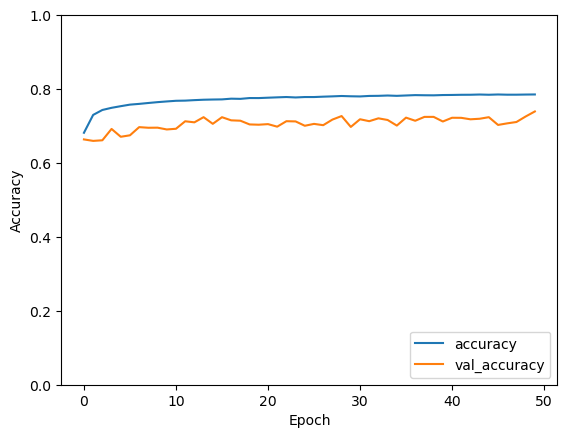

In [18]:
# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")

# Ploting training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
